In [274]:
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Graph
from random import seed
from random import random


In [325]:
def DFS(graph, node, visited, ret, counter):
    counter = counter + 1
    if node not in visited:
        ret += [node]
        visited.add(node)
        res = [n for n in graph.neighbors(node)]
        res.sort()
        for neighbour in res:
            DFS(graph, neighbour, visited, ret, counter)
    if counter == 1 and len(ret) != len(graph.nodes):
        counter = 0
        nodes = list(set([n for n in graph.nodes]).symmetric_difference(visited))
        nodes.sort()
        DFS(graph, nodes[0], visited, ret, counter)
        
    return ret[1:]


#taken from intarwobs
def remove_dups(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

def remove_one(seq):
    return [x for x in seq if not (x==1)]

def BFS(graph, node):
    res = [n for n in graph.neighbors(node)]
    res.sort()
    res = remove_one(remove_dups(res))
    ret = res
    
    visited = set()
    for item in res:
        visited.add(item)
    
    while len(ret) + 1 != len(graph.nodes):
        res1 = []
        for item in res:
            temp = [n for n in graph.neighbors(item)]
            temp.sort()
            res1 += temp
            for item in temp:
                visited.add(item)

        res = remove_one(remove_dups(res1))
        ret1 = ret + res
        ret1 = remove_dups(ret1)
        
        if ret == ret1:
            nodes = list(set([n for n in graph.nodes]).symmetric_difference(visited))
            nodes.sort()
            res = graph.neighbors(nodes[0])
        else:
            ret = ret1
    
    
    return ret
    
    
def graph_graph(my_graph, solution, file_name, title, alg):
    f = Graph(title, filename=file_name + ".gv")
    f.attr(rankdir='LR', size='10,6')
    f.attr('node', shape='doublecircle', style='filled', fillcolor='red')
    f.node('1')


    increment = 1/len(solution)
    for i, item in enumerate(solution):
        change = increment * i
        color_value = ".65 " + str(1-change) + " 1"
        f.attr('node', shape='circle', fillcolor=color_value, xlabel=str(i+2))
        f.node(str(item))


    for edge in my_graph:
        f.edge(str(edge[0]), str(edge[1]), color="1 0.05 .85")


    print()
    print()
    print()
    print("Traversal Solution for "+ alg + ":   " + str(solution))
    display(f)
    #f.view()
    
def display_graph(my_graph, file_name, title):
    f = Graph(title, filename=file_name + ".gv")
    f.attr(rankdir='LR', size='10,6')
    f.attr('node', shape='doublecircle', style='filled', fillcolor='red')
    f.node('1')
    f.attr('node', shape='circle', style='unfilled')

    for edge in my_graph:
        f.edge(str(edge[0]), str(edge[1]), color="1 0.05 .85")


    print()
    print()
    print()
    print("Original Graph")
    display(f)
    #f.view()
    
    
    
my_graph = [[27,2],[1,3],[1,4],[1,5],[3,4],[4,2],[5,2],[4,5],
           [6,2],[20,25],[7,20],[15,17],[16,16],[25,4],[4,7],[3,7]]

G = nx.MultiGraph()
for edge in my_graph:
    G.add_edge(edge[0], edge[1])
    
    
visited = set()
answer = []
sol_dfs = DFS(G, 1, visited, answer, 0)
sol_bfs = BFS(G,1)





Traversal Solution for DFS:   [3, 4, 2, 5, 6, 27, 7, 20, 25, 15, 17, 16]


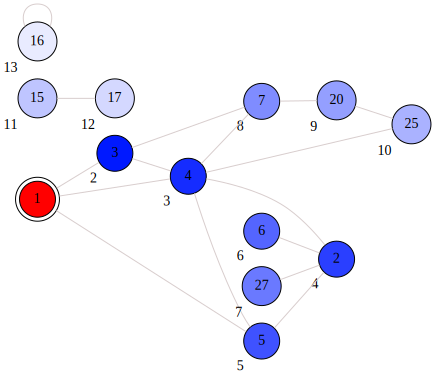




Traversal Solution for BFS:   [3, 4, 5, 7, 2, 25, 20, 6, 27, 15, 17, 16]


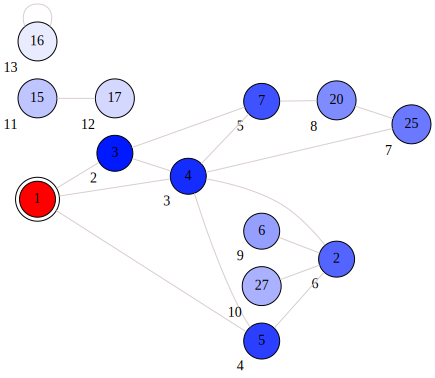

In [326]:
graph_graph(my_graph, sol_dfs, "solution_dfs", "DFS Transversal Sequence", "DFS")
graph_graph(my_graph, sol_bfs, "solution_bfs", "BFS Transversal Sequence", "BFS")


In [355]:
def generate_tree(rseed, count, size):

    seed(rseed)
    size = 1/size

    my_graph = []
    for i in range(0,count):
        x1 = int((random()*count)/size)+1
        x2 = int((random()*count)/size)+1
        if x1 > x2:
            temp = x2
            x2 = x1
            x1 = temp
        my_graph += [[x1, x2]]

    my_graph[0][0] = 1
    
    my_graph = dict((x[0], x) for x in my_graph).values()

    G = nx.MultiGraph()
    for edge in my_graph:
        G.add_edge(edge[0], edge[1])

    size = 1/size
    print(f"Tree Parameters: rseed: {rseed}, count: {count}, size: {size}\n\n")
    print(my_graph)
    display_graph(my_graph, "input graph", "Original")

    visited = set()
    answer = []
    sol_dfs = DFS(G, 1, visited, answer, 0)
    sol_bfs = BFS(G,1)
    
    graph_graph(my_graph, sol_dfs, "solution_dfs", "DFS Transversal Sequence", "DFS")
    graph_graph(my_graph, sol_bfs, "solution_bfs", "BFS Transversal Sequence", "BFS")
    print()
    print("\n\n\n\n\n\n")
    
    
def generate_graph(rseed, count, connectivity):

    seed(rseed)

    my_graph = []
    for i in range(0, int(count*connectivity)):
        x1 = int((random()*count))+1
        x2 = int((random()*count))+1
        if x1 > x2:
            temp = x2
            x2 = x1
            x1 = temp
        elif x1 == x2:
            x2 += 1
        my_graph += [[x1, x2]]

    my_graph[0][0] = 1
    
    my_graph = set(tuple(x) for x in my_graph)
    my_graph = [ list(x) for x in my_graph ]

    G = nx.MultiGraph()
    for edge in my_graph:
        G.add_edge(edge[0], edge[1])

    print(f"Graph Parameters: rseed: {rseed}, count: {count}, connectivity: {connectivity}\n\n")
    print(my_graph)
    display_graph(my_graph, "input graph", "Original")

    visited = set()
    answer = []
    sol_dfs = DFS(G, 1, visited, answer, 0)
    sol_bfs = BFS(G,1)
    
    graph_graph(my_graph, sol_dfs, "solution_dfs", "DFS Transversal Sequence", "DFS")
    graph_graph(my_graph, sol_bfs, "solution_bfs", "BFS Transversal Sequence", "BFS")
    print()
    print("\n\n\n\n\n\n")



Tree Parameters: rseed: 1, count: 25, size: 0.25


dict_values([[1, 3], [2, 5], [3, 6], [5, 6], [4, 6], [6, 7]])



Original Graph


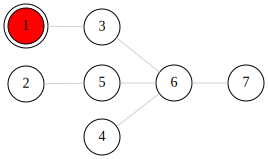




Traversal Solution for DFS:   [3, 6, 4, 5, 2, 7]


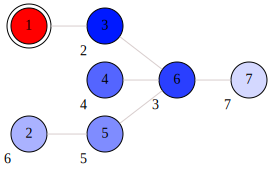




Traversal Solution for BFS:   [3, 6, 4, 5, 7, 2]


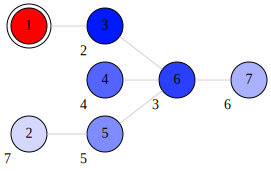









Tree Parameters: rseed: 1, count: 25, size: 0.333


dict_values([[1, 3], [3, 7], [4, 8], [6, 7], [2, 3], [5, 7], [8, 9]])



Original Graph


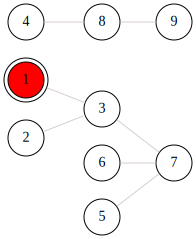




Traversal Solution for DFS:   [3, 2, 7, 5, 6, 4, 8, 9]


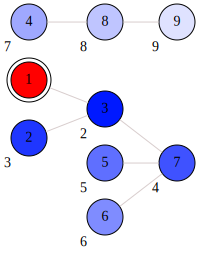




Traversal Solution for BFS:   [3, 2, 7, 5, 6, 4, 9, 8]


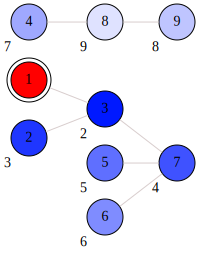









Tree Parameters: rseed: 1, count: 25, size: 0.5


dict_values([[1, 4], [4, 10], [6, 12], [9, 11], [3, 9], [5, 12], [7, 11], [11, 13], [2, 5]])



Original Graph


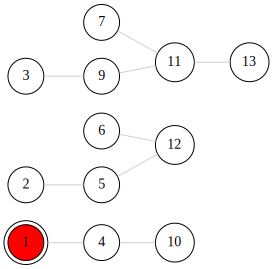




Traversal Solution for DFS:   [4, 10, 2, 5, 12, 6, 3, 9, 11, 7, 13]


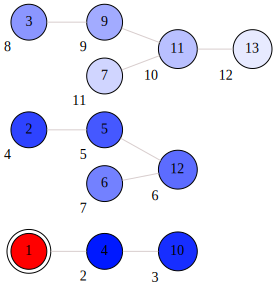




Traversal Solution for BFS:   [4, 10, 2, 12, 5, 6, 3, 11, 9, 7, 13]


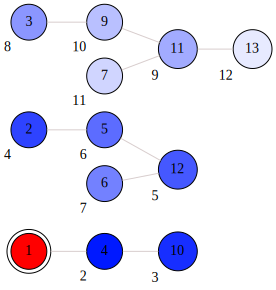









Tree Parameters: rseed: 1, count: 25, size: 0.25


dict_values([[1, 3], [2, 5], [3, 6], [5, 6], [4, 6], [6, 7]])



Original Graph


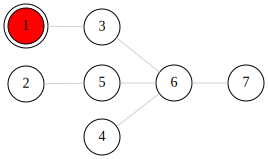




Traversal Solution for DFS:   [3, 6, 4, 5, 2, 7]


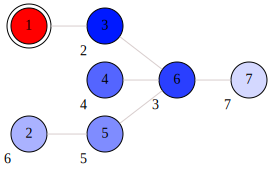




Traversal Solution for BFS:   [3, 6, 4, 5, 7, 2]


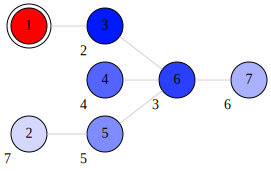









Tree Parameters: rseed: 1, count: 25, size: 0.333


dict_values([[1, 3], [3, 7], [4, 8], [6, 7], [2, 3], [5, 7], [8, 9]])



Original Graph


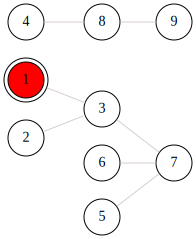




Traversal Solution for DFS:   [3, 2, 7, 5, 6, 4, 8, 9]


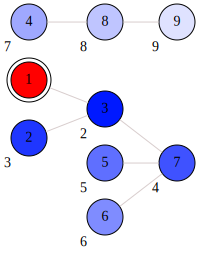




Traversal Solution for BFS:   [3, 2, 7, 5, 6, 4, 9, 8]


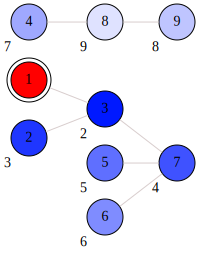









Tree Parameters: rseed: 1, count: 25, size: 0.5


dict_values([[1, 4], [4, 10], [6, 12], [9, 11], [3, 9], [5, 12], [7, 11], [11, 13], [2, 5]])



Original Graph


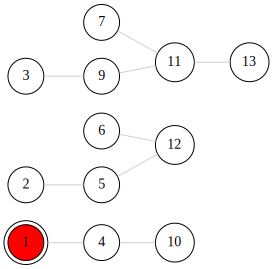




Traversal Solution for DFS:   [4, 10, 2, 5, 12, 6, 3, 9, 11, 7, 13]


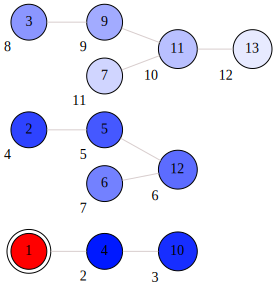




Traversal Solution for BFS:   [4, 10, 2, 12, 5, 6, 3, 11, 9, 7, 13]


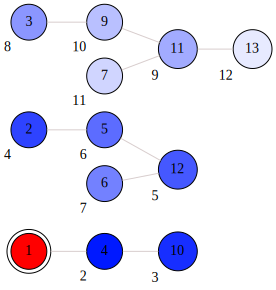









Tree Parameters: rseed: 1, count: 100, size: 0.25


dict_values([[1, 22], [7, 19], [12, 18], [17, 18], [11, 19], [6, 17], [10, 15], [14, 17], [5, 11], [22, 25], [4, 18], [18, 19], [8, 13], [13, 18], [2, 8], [15, 25], [20, 21], [19, 23], [9, 10], [3, 17], [16, 21], [21, 25]])



Original Graph


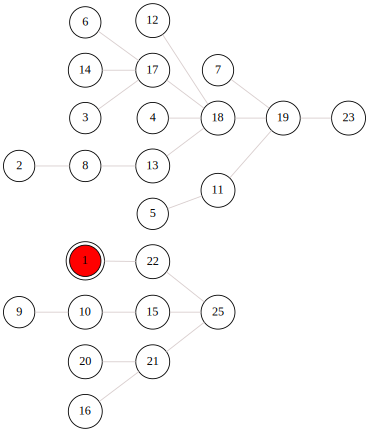




Traversal Solution for DFS:   [22, 25, 15, 10, 9, 21, 16, 20, 2, 8, 13, 18, 4, 12, 17, 3, 6, 14, 19, 7, 11, 5, 23]


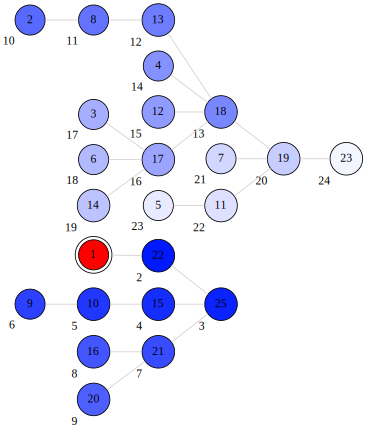




Traversal Solution for BFS:   [22, 25, 15, 21, 10, 16, 20, 9, 2, 13, 8, 18, 4, 12, 17, 19, 3, 6, 14, 7, 11, 23, 5]


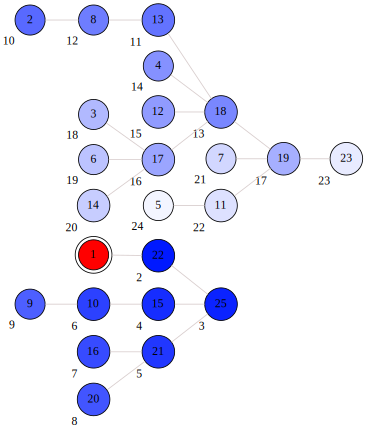









Tree Parameters: rseed: 1, count: 100, size: 0.333


dict_values([[1, 9], [9, 26], [15, 19], [22, 27], [8, 22], [2, 30], [13, 15], [19, 23], [7, 15], [29, 33], [5, 24], [24, 25], [23, 24], [11, 32], [17, 24], [14, 25], [6, 19], [20, 33], [18, 27], [16, 24], [27, 28], [25, 30], [12, 13], [3, 12], [4, 23], [21, 28], [30, 33], [28, 33], [10, 17]])



Original Graph


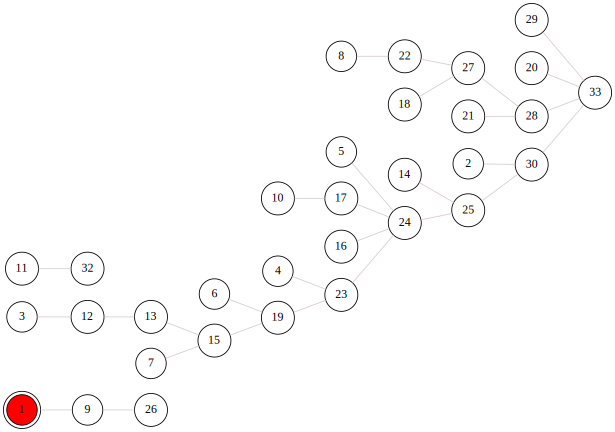




Traversal Solution for DFS:   [9, 26, 2, 30, 25, 14, 24, 5, 16, 17, 10, 23, 4, 19, 6, 15, 7, 13, 12, 3, 33, 20, 28, 21, 27, 18, 22, 8, 29, 11, 32]


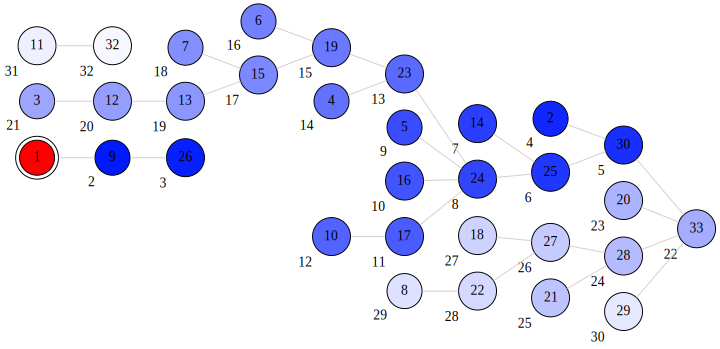




Traversal Solution for BFS:   [9, 26, 2, 25, 33, 30, 14, 24, 20, 28, 29, 5, 16, 17, 23, 21, 27, 10, 4, 19, 18, 22, 6, 15, 8, 7, 13, 12, 3, 11, 32]


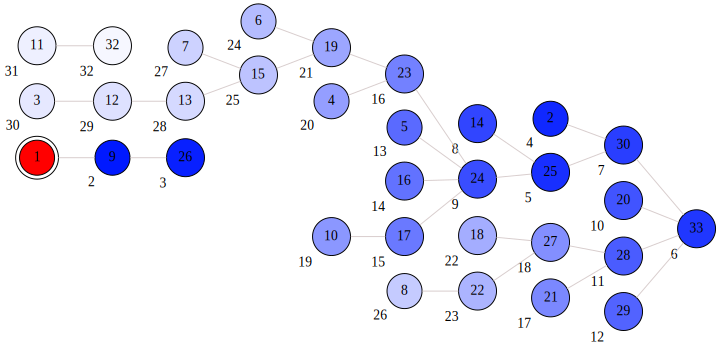









Tree Parameters: rseed: 1, count: 100, size: 0.5


dict_values([[1, 13], [13, 38], [23, 36], [33, 40], [2, 44], [22, 29], [12, 33], [20, 29], [11, 34], [28, 34], [10, 22], [43, 45], [7, 17], [36, 37], [34, 36], [16, 47], [26, 36], [21, 38], [9, 29], [19, 22], [3, 15], [30, 50], [27, 32], [14, 28], [40, 41], [38, 45], [25, 26], [18, 19], [5, 34], [6, 34], [4, 18], [8, 36], [17, 32], [31, 41], [44, 49], [41, 49], [15, 25]])



Original Graph


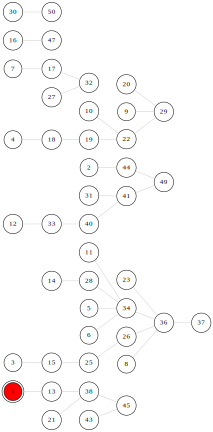




Traversal Solution for DFS:   [13, 38, 21, 45, 43, 2, 44, 49, 41, 31, 40, 33, 12, 3, 15, 25, 26, 36, 8, 23, 34, 5, 6, 11, 28, 14, 37, 4, 18, 19, 22, 10, 29, 9, 20, 7, 17, 32, 27, 16, 47, 30, 50]


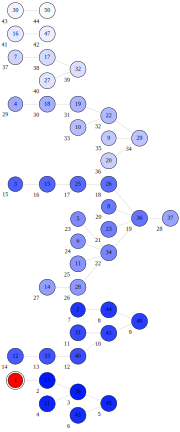




Traversal Solution for BFS:   [13, 38, 21, 45, 43, 2, 49, 44, 41, 31, 40, 33, 12, 3, 25, 15, 26, 36, 8, 23, 34, 37, 5, 6, 11, 28, 14, 4, 19, 18, 22, 10, 29, 9, 20, 7, 32, 17, 27, 16, 47, 30, 50]


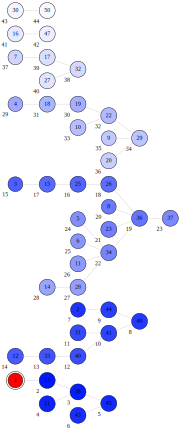









Tree Parameters: rseed: 1, count: 100, size: 0.25


dict_values([[1, 22], [7, 19], [12, 18], [17, 18], [11, 19], [6, 17], [10, 15], [14, 17], [5, 11], [22, 25], [4, 18], [18, 19], [8, 13], [13, 18], [2, 8], [15, 25], [20, 21], [19, 23], [9, 10], [3, 17], [16, 21], [21, 25]])



Original Graph


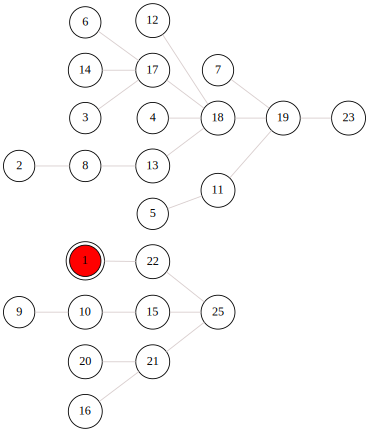




Traversal Solution for DFS:   [22, 25, 15, 10, 9, 21, 16, 20, 2, 8, 13, 18, 4, 12, 17, 3, 6, 14, 19, 7, 11, 5, 23]


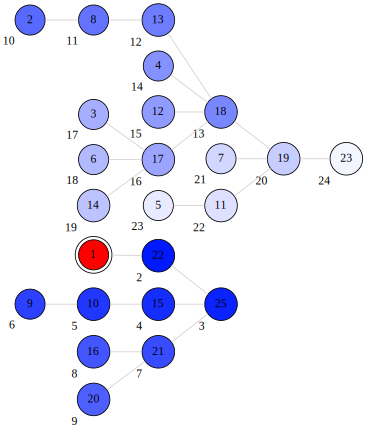




Traversal Solution for BFS:   [22, 25, 15, 21, 10, 16, 20, 9, 2, 13, 8, 18, 4, 12, 17, 19, 3, 6, 14, 7, 11, 23, 5]


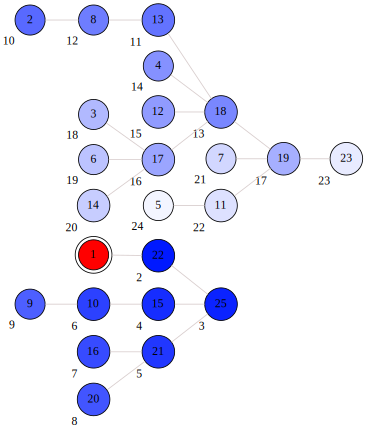









Tree Parameters: rseed: 1, count: 100, size: 0.333


dict_values([[1, 9], [9, 26], [15, 19], [22, 27], [8, 22], [2, 30], [13, 15], [19, 23], [7, 15], [29, 33], [5, 24], [24, 25], [23, 24], [11, 32], [17, 24], [14, 25], [6, 19], [20, 33], [18, 27], [16, 24], [27, 28], [25, 30], [12, 13], [3, 12], [4, 23], [21, 28], [30, 33], [28, 33], [10, 17]])



Original Graph


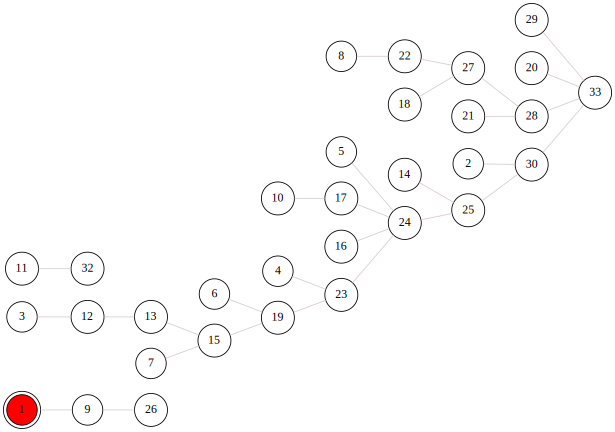




Traversal Solution for DFS:   [9, 26, 2, 30, 25, 14, 24, 5, 16, 17, 10, 23, 4, 19, 6, 15, 7, 13, 12, 3, 33, 20, 28, 21, 27, 18, 22, 8, 29, 11, 32]


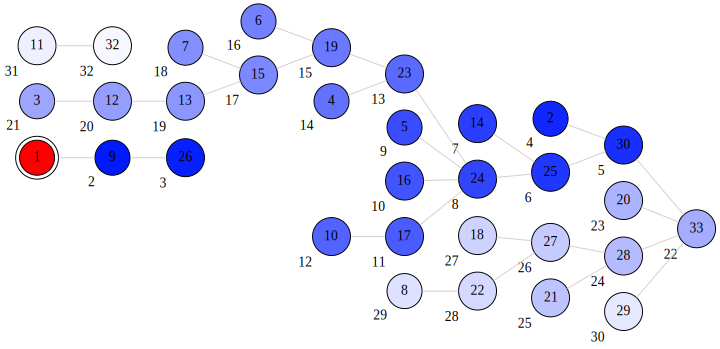




Traversal Solution for BFS:   [9, 26, 2, 25, 33, 30, 14, 24, 20, 28, 29, 5, 16, 17, 23, 21, 27, 10, 4, 19, 18, 22, 6, 15, 8, 7, 13, 12, 3, 11, 32]


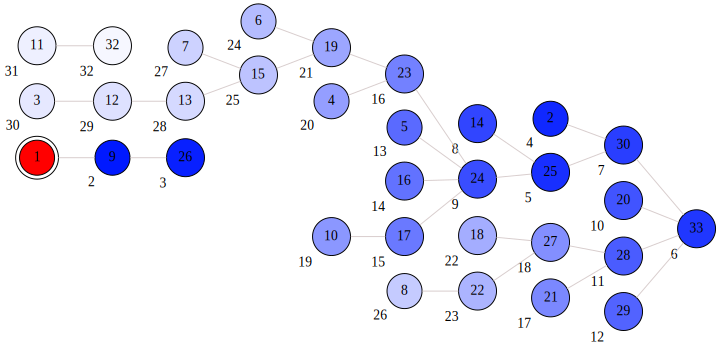









Tree Parameters: rseed: 1, count: 100, size: 0.5


dict_values([[1, 13], [13, 38], [23, 36], [33, 40], [2, 44], [22, 29], [12, 33], [20, 29], [11, 34], [28, 34], [10, 22], [43, 45], [7, 17], [36, 37], [34, 36], [16, 47], [26, 36], [21, 38], [9, 29], [19, 22], [3, 15], [30, 50], [27, 32], [14, 28], [40, 41], [38, 45], [25, 26], [18, 19], [5, 34], [6, 34], [4, 18], [8, 36], [17, 32], [31, 41], [44, 49], [41, 49], [15, 25]])



Original Graph


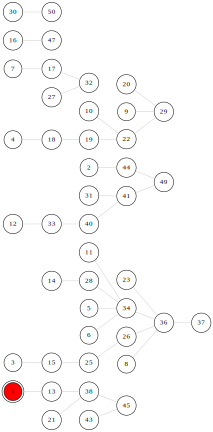




Traversal Solution for DFS:   [13, 38, 21, 45, 43, 2, 44, 49, 41, 31, 40, 33, 12, 3, 15, 25, 26, 36, 8, 23, 34, 5, 6, 11, 28, 14, 37, 4, 18, 19, 22, 10, 29, 9, 20, 7, 17, 32, 27, 16, 47, 30, 50]


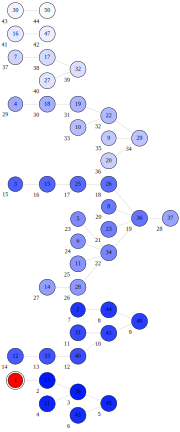




Traversal Solution for BFS:   [13, 38, 21, 45, 43, 2, 49, 44, 41, 31, 40, 33, 12, 3, 25, 15, 26, 36, 8, 23, 34, 37, 5, 6, 11, 28, 14, 4, 19, 18, 22, 10, 29, 9, 20, 7, 32, 17, 27, 16, 47, 30, 50]


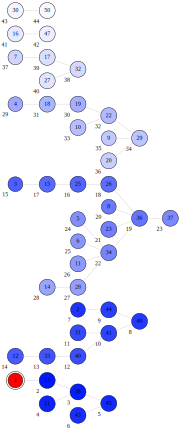









MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS
MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS
MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS
MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS
MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS
MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS




Graph Parameters: rseed: 1, count: 25, connectivity: 0.25


[[7, 20], [1, 3], [1, 22], [12, 13], [17, 20], [11, 21]]



Original Graph


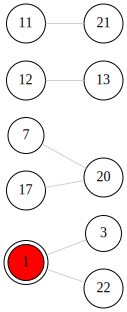




Traversal Solution for DFS:   [3, 22, 7, 20, 17, 11, 21, 12, 13]


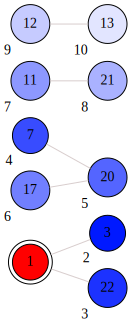




Traversal Solution for BFS:   [3, 22, 7, 17, 20, 11, 21, 12, 13]


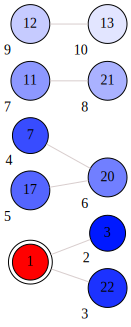









Graph Parameters: rseed: 1, count: 25, connectivity: 0.5


[[7, 20], [1, 3], [1, 22], [1, 23], [12, 13], [1, 14], [17, 20], [12, 19], [10, 24], [6, 24], [11, 21], [1, 20]]



Original Graph


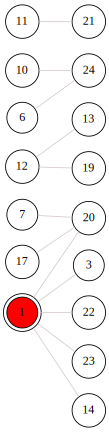




Traversal Solution for DFS:   [3, 14, 20, 7, 17, 22, 23, 6, 24, 10, 11, 21, 12, 13, 19]


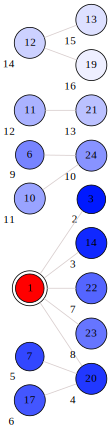




Traversal Solution for BFS:   [3, 14, 20, 22, 23, 7, 17, 6, 10, 24, 11, 21, 12, 13, 19]


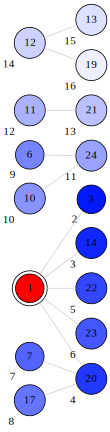









Graph Parameters: rseed: 1, count: 25, connectivity: 0.75


[[7, 20], [1, 3], [1, 22], [6, 7], [1, 23], [12, 13], [6, 11], [1, 14], [17, 20], [12, 19], [10, 24], [1, 8], [1, 6], [6, 24], [11, 21], [6, 12], [1, 20], [11, 13]]



Original Graph


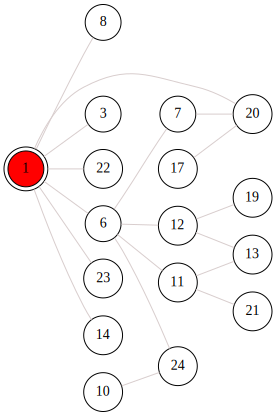




Traversal Solution for DFS:   [3, 6, 7, 20, 17, 11, 13, 12, 19, 21, 24, 10, 8, 14, 22, 23]


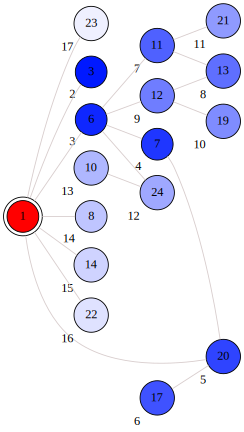




Traversal Solution for BFS:   [3, 6, 8, 14, 20, 22, 23, 7, 11, 12, 24, 17, 13, 21, 19, 10]


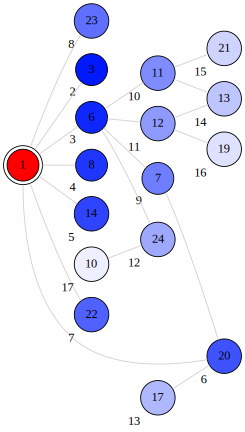









Graph Parameters: rseed: 1, count: 25, connectivity: 1


[[1, 3], [17, 20], [1, 6], [6, 24], [18, 19], [11, 24], [1, 20], [7, 20], [6, 7], [4, 9], [12, 13], [1, 14], [11, 13], [1, 23], [6, 11], [5, 17], [10, 24], [11, 21], [6, 12], [22, 25], [1, 22], [12, 19], [17, 21], [1, 8], [14, 21]]



Original Graph


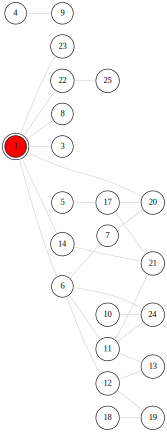




Traversal Solution for DFS:   [3, 6, 7, 20, 17, 5, 21, 11, 13, 12, 19, 18, 24, 10, 14, 8, 22, 25, 23, 4, 9]


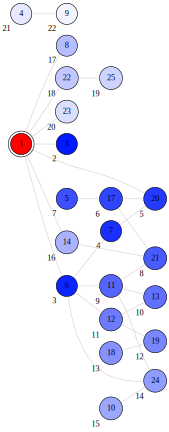




Traversal Solution for BFS:   [3, 6, 8, 14, 20, 22, 23, 7, 11, 12, 24, 21, 17, 25, 13, 19, 10, 5, 18, 4, 9]


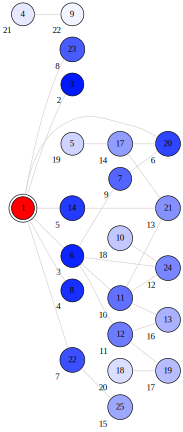









Graph Parameters: rseed: 1, count: 25, connectivity: 1.25


[[1, 3], [22, 23], [17, 20], [1, 6], [6, 24], [18, 19], [11, 24], [1, 20], [7, 20], [6, 7], [4, 9], [12, 13], [1, 14], [8, 15], [11, 13], [1, 23], [6, 11], [5, 17], [13, 15], [10, 24], [11, 21], [6, 12], [22, 25], [1, 22], [12, 19], [5, 14], [17, 21], [1, 8], [11, 20], [14, 21], [1, 7]]



Original Graph


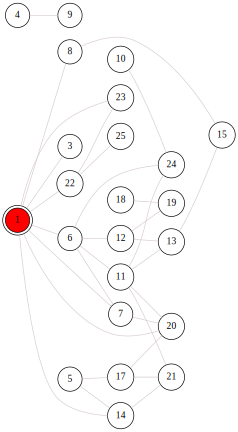




Traversal Solution for DFS:   [3, 6, 7, 20, 11, 13, 12, 19, 18, 15, 8, 21, 14, 5, 17, 24, 10, 22, 23, 25, 4, 9]


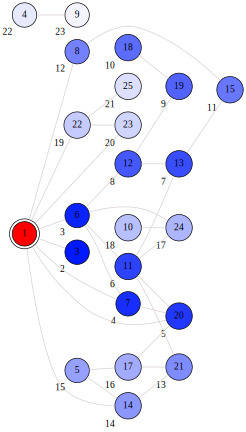




Traversal Solution for BFS:   [3, 6, 7, 8, 14, 20, 22, 23, 11, 12, 24, 15, 5, 21, 17, 25, 13, 19, 10, 18, 4, 9]


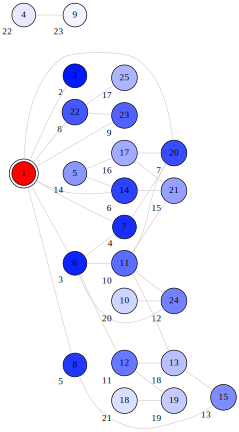









Graph Parameters: rseed: 1, count: 100, connectivity: 0.25


[[44, 84], [1, 77], [72, 73], [26, 77], [43, 94], [3, 55], [3, 10], [19, 65], [56, 84], [1, 85], [66, 79], [23, 95], [3, 23], [4, 91], [22, 46], [44, 50], [39, 94], [45, 73], [68, 84], [13, 34], [24, 25], [86, 100], [45, 50], [3, 29], [22, 43]]



Original Graph


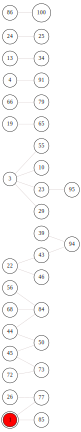




Traversal Solution for DFS:   [77, 26, 85, 3, 10, 23, 95, 29, 55, 4, 91, 13, 34, 19, 65, 22, 43, 94, 39, 46, 24, 25, 44, 50, 45, 73, 72, 84, 56, 68, 66, 79, 86, 100]


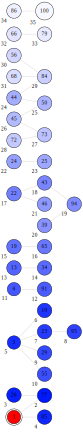




Traversal Solution for BFS:   [77, 85, 26, 3, 95, 10, 23, 29, 55, 4, 91, 13, 34, 19, 65, 22, 94, 43, 46, 39, 24, 25, 44, 56, 68, 45, 50, 84, 73, 72, 66, 79, 86, 100]


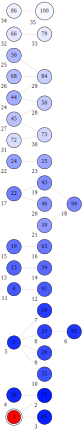









Graph Parameters: rseed: 1, count: 100, connectivity: 0.5


[[18, 55], [68, 71], [44, 84], [1, 77], [43, 57], [51, 78], [54, 78], [72, 73], [38, 44], [26, 77], [79, 83], [27, 55], [43, 94], [3, 55], [3, 10], [5, 71], [19, 65], [56, 84], [1, 85], [66, 79], [23, 95], [3, 23], [42, 80], [40, 53], [4, 91], [22, 46], [60, 99], [44, 50], [39, 94], [31, 59], [4, 25], [46, 58], [75, 89], [45, 73], [68, 84], [85, 89], [13, 34], [51, 59], [52, 96], [24, 25], [86, 100], [45, 50], [51, 99], [24, 87], [3, 29], [22, 43], [18, 40], [1, 96], [3, 49], [52, 81]]



Original Graph


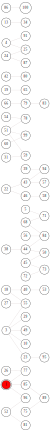




Traversal Solution for DFS:   [77, 26, 85, 89, 75, 96, 52, 81, 3, 10, 23, 95, 29, 49, 55, 18, 40, 53, 27, 4, 25, 24, 87, 91, 5, 71, 68, 84, 44, 38, 50, 45, 73, 72, 56, 13, 34, 19, 65, 22, 43, 57, 94, 39, 46, 58, 31, 59, 51, 78, 54, 99, 60, 42, 80, 66, 79, 83, 86, 100]


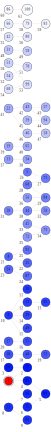




Traversal Solution for BFS:   [77, 85, 96, 26, 89, 52, 75, 81, 3, 18, 27, 95, 10, 23, 29, 49, 55, 40, 53, 4, 24, 25, 91, 87, 5, 68, 71, 84, 44, 56, 38, 50, 45, 73, 72, 13, 34, 19, 65, 22, 58, 57, 94, 43, 46, 39, 31, 51, 59, 78, 99, 54, 60, 42, 80, 66, 83, 79, 86, 100]


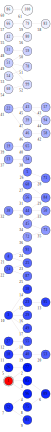









Graph Parameters: rseed: 1, count: 100, connectivity: 0.75


[[18, 55], [68, 71], [44, 84], [49, 51], [26, 85], [61, 82], [1, 77], [43, 57], [18, 59], [51, 78], [54, 78], [72, 73], [11, 90], [80, 87], [38, 44], [26, 77], [79, 83], [54, 63], [27, 55], [20, 57], [43, 94], [17, 28], [3, 55], [3, 10], [5, 71], [3, 39], [19, 65], [35, 36], [80, 82], [19, 43], [56, 84], [1, 85], [21, 52], [66, 79], [23, 95], [46, 62], [3, 23], [42, 80], [11, 63], [40, 53], [4, 91], [22, 46], [60, 99], [44, 50], [39, 94], [31, 59], [4, 25], [46, 58], [6, 88], [75, 89], [9, 68], [45, 73], [2, 3], [68, 84], [16, 53], [46, 72], [85, 89], [7, 35], [13, 34], [33, 48], [51, 59], [52, 96], [24, 25], [86, 100], [45, 50], [51, 99], [24, 87], [3, 29], [22, 43], [18, 40], [1, 96], [3, 49], [52, 81], [25, 76]]



Original Graph


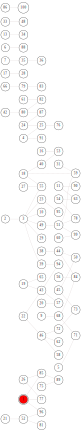




Traversal Solution for DFS:   [77, 26, 85, 89, 75, 96, 52, 21, 81, 2, 3, 10, 23, 95, 29, 39, 94, 43, 19, 65, 22, 46, 58, 62, 72, 73, 45, 50, 44, 38, 84, 56, 68, 9, 71, 5, 57, 20, 49, 51, 59, 18, 40, 53, 16, 55, 27, 31, 78, 54, 63, 11, 90, 99, 60, 4, 25, 24, 87, 80, 42, 82, 61, 76, 91, 6, 88, 7, 35, 36, 13, 34, 17, 28, 33, 48, 66, 79, 83, 86, 100]


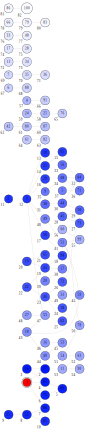




Traversal Solution for BFS:   [77, 85, 96, 26, 89, 52, 75, 21, 81, 2, 10, 23, 29, 39, 49, 55, 3, 95, 94, 51, 18, 27, 43, 59, 78, 99, 40, 19, 22, 57, 31, 54, 60, 53, 65, 46, 20, 63, 16, 58, 62, 72, 11, 73, 90, 45, 50, 44, 38, 84, 56, 68, 9, 71, 5, 4, 24, 76, 25, 91, 87, 80, 42, 82, 61, 6, 88, 7, 36, 35, 13, 34, 17, 28, 33, 48, 66, 83, 79, 86, 100]


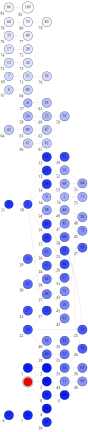









Graph Parameters: rseed: 1, count: 100, connectivity: 1


[[18, 55], [61, 82], [23, 98], [72, 73], [11, 90], [79, 83], [26, 77], [27, 55], [5, 71], [11, 67], [19, 65], [35, 36], [23, 95], [46, 62], [3, 23], [11, 63], [44, 50], [6, 88], [52, 80], [7, 35], [51, 59], [86, 100], [3, 39], [1, 96], [43, 57], [82, 97], [49, 51], [1, 26], [51, 78], [21, 68], [23, 65], [38, 44], [3, 55], [32, 94], [33, 64], [80, 82], [19, 43], [21, 52], [20, 44], [17, 71], [25, 76], [6, 30], [22, 46], [15, 72], [46, 72], [40, 58], [85, 89], [13, 34], [52, 96], [24, 25], [18, 58], [31, 86], [45, 50], [51, 99], [24, 87], [22, 43], [3, 49], [52, 81], [68, 71], [44, 84], [26, 85], [1, 77], [51, 71], [54, 78], [54, 63], [17, 28], [3, 10], [42, 80], [60, 99], [31, 59], [39, 94], [2, 3], [45, 73], [68, 84], [42, 75], [33, 48], [35, 38], [66, 79], [30, 50], [18, 59], [88, 97], [4, 88], [20, 57], [43, 94], [56, 84], [1, 85], [40, 53], [80, 87], [4, 91], [87, 98], [46, 58], [4, 25], [9, 68], [55, 68], [16, 53], [

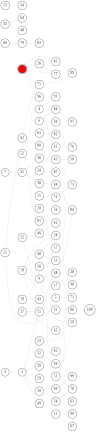




Traversal Solution for DFS:   [26, 77, 85, 89, 75, 42, 80, 52, 21, 68, 9, 55, 3, 2, 10, 23, 65, 19, 43, 22, 46, 58, 18, 40, 53, 16, 59, 31, 86, 100, 51, 49, 71, 5, 17, 28, 78, 54, 63, 11, 67, 90, 99, 60, 62, 72, 15, 73, 45, 50, 30, 6, 88, 4, 25, 24, 87, 98, 76, 91, 97, 82, 61, 44, 20, 57, 38, 35, 7, 36, 84, 56, 94, 32, 39, 95, 29, 27, 81, 96, 13, 34, 33, 48, 64, 66, 79, 83]


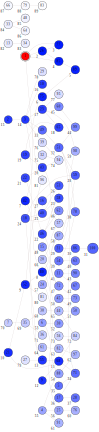




Traversal Solution for BFS:   [26, 77, 85, 96, 89, 52, 75, 21, 80, 81, 42, 68, 82, 87, 9, 55, 71, 84, 61, 97, 24, 98, 3, 18, 27, 5, 17, 51, 44, 56, 88, 25, 23, 2, 10, 29, 39, 49, 40, 58, 59, 28, 78, 99, 20, 38, 50, 4, 6, 76, 65, 95, 94, 53, 46, 31, 54, 60, 57, 35, 30, 45, 91, 19, 32, 43, 16, 22, 62, 72, 86, 63, 7, 36, 73, 15, 100, 11, 67, 90, 13, 34, 33, 48, 64, 66, 83, 79]


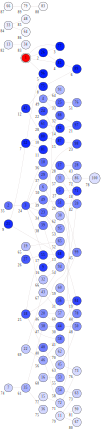









Graph Parameters: rseed: 1, count: 100, connectivity: 1.25


[[18, 55], [61, 82], [23, 98], [72, 73], [11, 90], [61, 76], [79, 83], [26, 77], [27, 55], [5, 71], [11, 67], [37, 85], [19, 65], [35, 36], [23, 95], [8, 87], [46, 62], [3, 23], [11, 63], [44, 50], [6, 88], [52, 80], [2, 90], [7, 35], [24, 73], [51, 59], [86, 100], [3, 39], [1, 96], [43, 57], [82, 97], [49, 51], [1, 26], [51, 78], [35, 62], [21, 68], [89, 96], [23, 65], [38, 44], [3, 55], [79, 99], [14, 56], [69, 89], [32, 94], [33, 64], [80, 82], [19, 43], [21, 52], [20, 44], [17, 71], [21, 33], [25, 76], [6, 30], [22, 46], [15, 72], [46, 72], [40, 58], [4, 11], [85, 89], [13, 34], [52, 96], [24, 25], [18, 58], [31, 86], [61, 87], [45, 50], [51, 99], [24, 87], [22, 43], [22, 92], [3, 49], [52, 81], [68, 71], [44, 84], [26, 85], [1, 77], [51, 71], [54, 78], [54, 63], [17, 28], [3, 10], [22, 34], [42, 80], [60, 99], [31, 59], [39, 94], [2, 3], [45, 73], [68, 84], [9, 27], [42, 75], [33, 48], [35, 38], [66, 79], [30, 50

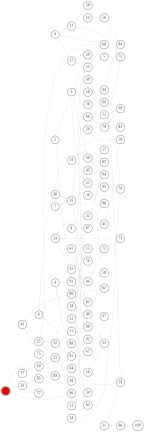




Traversal Solution for DFS:   [26, 77, 85, 37, 89, 69, 75, 42, 80, 52, 21, 33, 48, 64, 88, 4, 11, 63, 54, 78, 51, 49, 3, 2, 90, 10, 23, 58, 18, 40, 53, 16, 55, 27, 9, 17, 28, 71, 5, 68, 84, 44, 20, 57, 43, 19, 65, 22, 34, 13, 46, 62, 35, 7, 30, 6, 50, 45, 73, 24, 25, 76, 61, 82, 97, 87, 8, 98, 72, 15, 36, 38, 79, 66, 83, 99, 60, 94, 32, 39, 92, 56, 14, 59, 31, 86, 100, 95, 29, 67, 91, 81, 96]


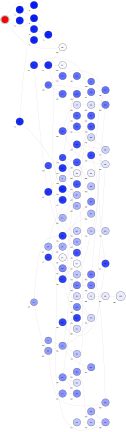




Traversal Solution for BFS:   [26, 77, 85, 96, 37, 89, 52, 69, 75, 21, 80, 81, 42, 33, 68, 82, 87, 48, 64, 88, 9, 55, 71, 84, 61, 97, 8, 24, 98, 4, 6, 17, 27, 3, 18, 5, 51, 44, 56, 76, 25, 73, 23, 11, 91, 30, 28, 2, 10, 29, 39, 49, 40, 58, 59, 78, 99, 20, 38, 50, 14, 45, 72, 65, 95, 63, 67, 90, 35, 94, 53, 46, 31, 54, 60, 79, 57, 15, 19, 7, 36, 62, 32, 43, 16, 22, 86, 66, 83, 34, 92, 100, 13]


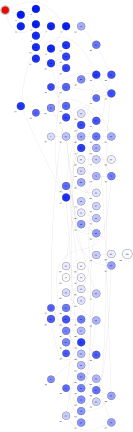

In [356]:
generate_tree(rseed=1, count=25, size=.25)
generate_tree(rseed=1, count=25, size=.333)
generate_tree(rseed=1, count=25, size=.5)

generate_tree(rseed=1, count=25, size=.25)
generate_tree(rseed=1, count=25, size=.333)
generate_tree(rseed=1, count=25, size=.5)

generate_tree(rseed=1, count=100, size=.25)
generate_tree(rseed=1, count=100, size=.333)
generate_tree(rseed=1, count=100, size=.5)

generate_tree(rseed=1, count=100, size=.25)
generate_tree(rseed=1, count=100, size=.333)
generate_tree(rseed=1, count=100, size=.5)



print("MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS")
print("MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS")
print("MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS")
print("MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS")
print("MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS")
print("MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS   MOVING ONTO GRAPHS")
print("\n\n\n")

generate_graph(rseed=1, count=25, connectivity=.25)
generate_graph(rseed=1, count=25, connectivity=.5)
generate_graph(rseed=1, count=25, connectivity=.75)
generate_graph(rseed=1, count=25, connectivity=1)
generate_graph(rseed=1, count=25, connectivity=1.25)


generate_graph(rseed=1, count=100, connectivity=.25)
generate_graph(rseed=1, count=100, connectivity=.5)
generate_graph(rseed=1, count=100, connectivity=.75)
generate_graph(rseed=1, count=100, connectivity=1)
generate_graph(rseed=1, count=100, connectivity=1.25)